<a href="https://colab.research.google.com/github/FinaAnriani/TugasDataMining2/blob/main/Tugas2datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Nama : Fina Anriani**
#**NIM : 2209116051**
#**Kelas : Sistem Informasi A 2022**
#**Sesi : A2**

#**Faktor-faktor yang Mempengaruhi seseorang Berbelanja di Online Store**

#**Import Library**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#**BUSINESS UNDERSTANDING**

#**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk memahami faktor-faktor yang mempengaruhi seseorang untuk berbelanja di online store. Selain itu juga untuk meningkatkan tingkat konversi pembelian di online store, serta mengoptimalkan strategi marketing online store.

#**Assess Situation**

• Pertumbuhan e-commerce yang pesat.

• Kebutuhan untuk memahami perilaku konsumen online.


#**Data Mining Goals**

• Mengidentifikasi faktor-faktor yang mempengaruhi seseorang untuk berbelanja di online store.

• Membangun model prediktif untuk memprediksi kemungkinan pembelian di online store.

• Memberikan rekomendasi untuk optimasi strategi marketing online store.

#**Project Plan**

Rencana proyek dimulai dengan mengumpulkan data dari berbagai sumber, seperti website online store, database pelanggan, survei online, dan lain-lain. Kemudian data dibersihkan, ditangani missing values nya, dan dilakukan transformasi data. Setelah itu data dianalisis untuk memahami pola dan tren. Lalu dibangun model prediktif menggunakan algoritma data mining yang sesuai. Terakhir, data dievaluasi kinerja model nya dan dipastikan lagi bahwa model sudah baik.

#**DATA UNDERSTANDING**

#**Collect Initial Data**

Dataset **"Online Store Customer data"** ini merupakan sebuah dataset yang berisi data-data dari pelanggan dari toko online. Dataset ini bersumber dari kaggle.

Berikut adalah link nya:
https://www.kaggle.com/datasets/mountboy/online-store-customer-data

In [ ]:
df_file = pd.read_csv('/content/online_store_customer_data.csv')

In [ ]:
df_file

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


#**Describe Data**

#Informasi Dasar

In [ ]:
df_file.shape

(2512, 11)

Dataset **"Online Store Customer Data"** ini merupakan sebuah dataset yang memiliki kolom sebanyak **11 kolom**, dan memiliki baris sebanyak **2512 baris**.

#Informasi Lanjutan

In [ ]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


Jadi kolom yang terdapat dalam dataset **"Online Store Customer Data"** ini adalah sebanyak 11 kolom dan memiliki 2512 baris.


1. Transaction Date (Tipe data: object): Kolom ini berisi tanggal dan waktu terjadinya transaksi.
2. Transaction Id (Tipe data: int64): Kolom ini berisi identifikasi unik untuk setiap transaksi. Biasanya berupa angka atau kombinasi angka dan huruf.
3. Gender (Tipe data: object): Kolom ini berisi informasi tentang jenis kelamin pelanggan.
4. Age (Tipe data: float64): Kolom ini berisi informasi tentang usia pelanggan.
5. Marital Status (Tipe data: object): Kolom ini berisi informasi tentang status pernikahan pelanggan.
6. State Names (Tipe data: object): Kolom ini berisi informasi tentang negara bagian atau provinsi tempat tinggal pelanggan.
7. Segment (Tipe data: object): Kolom ini berisi informasi tentang segmen atau kategori pelanggan.
8. Employees Status	(Tipe data: object): Kolom ini berisi informasi tentang status karyawan pelanggan.
9. Payment Method	(Tipe datta: object): Kolom ini berisi informasi tentang metode pembayaran yang digunakan pelanggan.
10. Referal	(Tipe data: float64): Kolom ini berisi informasi tentang sumber referral atau perujuk pelanggan, misalnya kode promo, iklan tertentu, atau nama referal lainnya.
11. Amount Spent (Tipe data: float64): Kolom ini berisi informasi tentang jumlah yang dibelanjakan pelanggan dalam transaksi tersebut.

#Informasi Statistik Deskriptif

In [ ]:
df_file.describe()

,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


Kolom:

1. Transaction_ID: Kolom ini berisi ID transaksi, yang merupakan pengenal unik untuk setiap transaksi.
2. Age: Kolom ini berisi usia pelanggan yang melakukan transaksi.
3. Referal: Kolom ini berisi informasi tentang bagaimana pelanggan mengetahui tentang toko, seperti melalui iklan, media sosial, atau dari teman.
4. Amount_spent: Kolom ini berisi jumlah yang dihabiskan pelanggan dalam transaksi.





Baris:

1. count: Baris ini menunjukkan jumlah total transaksi yang dianalisis.
2. mean: Baris ini menunjukkan rata-rata untuk setiap kolom. Dalam hal ini, rata-rata ID transaksi adalah 152443.931131, rata-rata usia pelanggan adalah 46.637652, rata-rata nilai referral adalah 0.652100, dan rata-rata jumlah yang dihabiskan adalah 1418.422577.
3. std: Baris ini menunjukkan standar deviasi untuk setiap kolom. Standar deviasi adalah ukuran seberapa tersebar data di sekitar rata-rata. Semakin tinggi standar deviasi, semakin banyak data yang bervariasi dari rata-rata.
4. min: Baris ini menunjukkan nilai minimum untuk setiap kolom. Nilai minimum adalah nilai terendah yang ditemukan dalam kolom.
5. 25%: Baris ini menunjukkan kuartil pertama untuk setiap kolom. Kuartil pertama adalah nilai yang membagi data menjadi dua bagian, dengan 25% data di bawah kuartil pertama dan 75% data di atasnya.
6. 50%: Baris ini menunjukkan median untuk setiap kolom. Median adalah nilai tengah dalam kumpulan data.
7. 75%: Baris ini menunjukkan kuartil ketiga untuk setiap kolom. Kuartil ketiga adalah nilai yang membagi data menjadi dua bagian, dengan 75% data di bawah kuartil ketiga dan 25% data di atasnya.
8. max: Baris ini menunjukkan nilai maksimum untuk setiap kolom. Nilai maksimum adalah nilai tertinggi yang ditemukan dalam kolom.



#Exploratory Data Analysis

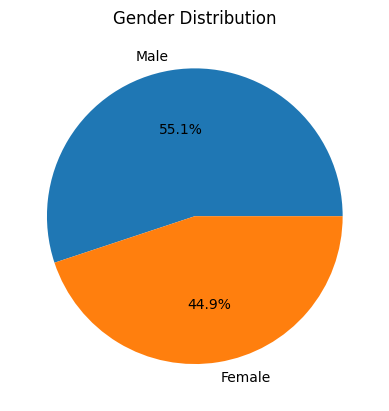

In [ ]:
plt.pie(df_file["Gender"].value_counts(), labels=["Male", "Female"], autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()

Visualisasi diatas menunjukkan bahwa proporsi wanita yang berbelanja online lebih tinggi dibandingkan pria. Hal ini dapat disimpulkan bahwa gender merupakan salah satu faktor yang mempengaruhi seseorang berbelanja di online store.

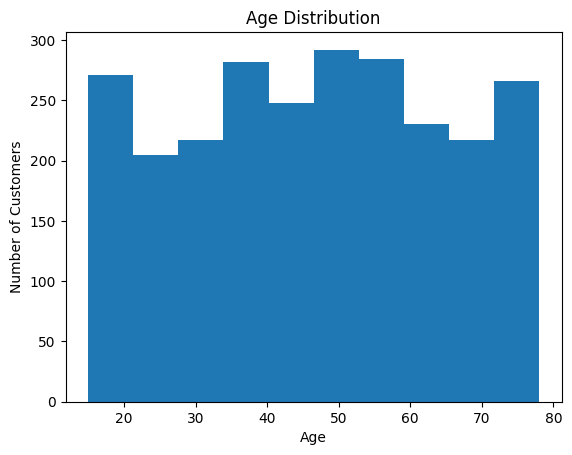

In [ ]:
plt.hist(df_file["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

Visualisasi diatas menunjukkan bahwa pelanggan online store terbanyak berada pada usia 25-45 tahun. Hal ini menunjukkan bahwa usia merupakan faktor penting dalam menentukan target pasar online store.

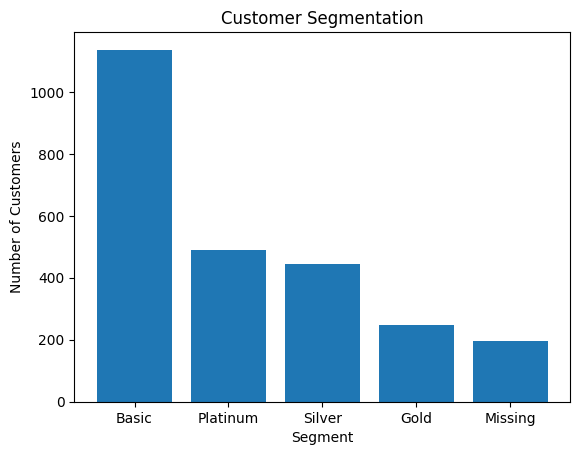

In [ ]:
plt.bar(df_file["Segment"].unique(), df_file["Segment"].value_counts())
plt.title("Customer Segmentation")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

Visualisasi diatas menunjukkan bahwa sebagian besar pelanggan online store berada di segmen Silver. Hal ini dapat menjadi informasi penting bagi online store untuk menentukan strategi marketing dan promosi yang sesuai dengan segmen Silver.

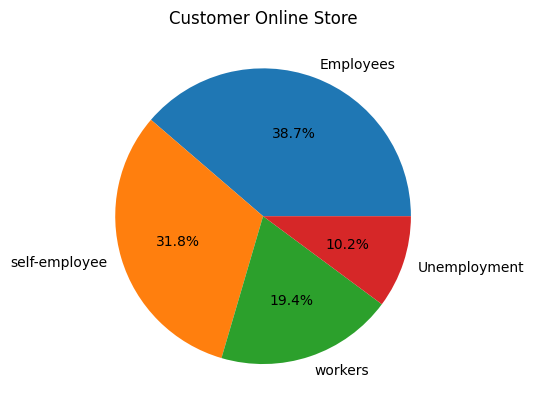

In [ ]:
plt.pie(df_file["Employees_status"].value_counts(), labels=["Employees", "self-employee", "workers", "Unemployment"], autopct="%1.1f%%")
plt.title("Customer Online Store")
plt.show()

Visualisasi diatas menunjukkan bahwa karyawan, wirausaha, dan pekerja lebih banyak melakukan pembelian di online store dibandingkan yang bukan karyawan(tidak memiliki pekerjaan). Hal ini bisa jadi karena gaji dari karyawan, wirausaha, dan pekerja lebih pasti serta mereka memiliki waktu yang terbatas untuk berbelanja di toko fisik dibanding dengan yang bukan karyawan(tidak memiliki pekerjaan).

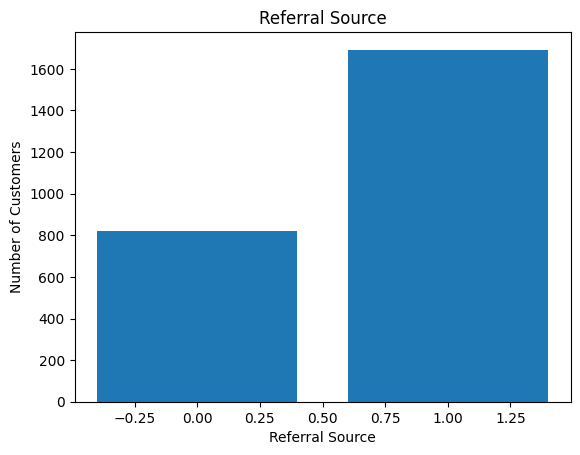

In [ ]:
plt.bar(df_file["Referal"].unique(), df_file["Referal"].value_counts())
plt.title("Referral Source")
plt.xlabel("Referral Source")
plt.ylabel("Number of Customers")
plt.show()

Visualisasi diatas menunjukkan bahwa sumber referral yang paling banyak digunakan adalah email. Hal ini menunjukkan bahwa strategi email marketing online store cukup efektif dalam menarik pelanggan baru.

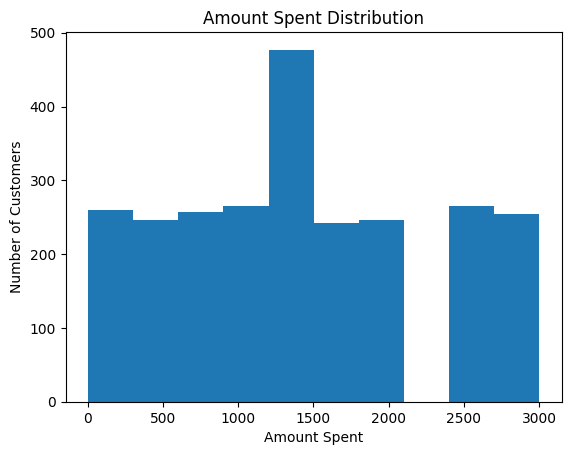

In [ ]:
plt.hist(df_file["Amount_spent"])
plt.title("Amount Spent Distribution")
plt.xlabel("Amount Spent")
plt.ylabel("Number of Customers")
plt.show()

Visualisasi diatas menunjukkan bahwa distribusi pengeluaran pelanggan online store tidak merata. Hal ini menunjukkan bahwa terdapat kelompok pelanggan yang melakukan pembelian dalam jumlah besar (high-value customers).

#**Verify Data Quality**

#Missing Values

In [ ]:
df_file.isnull().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64

Berdasarkan output dataframe diatas, terdapat missing values pada beberapa kolom dataframe, yakni:

1. Kolom Gender memiliki 28 missing values.
2. Kolom Age memiliki 42 missing values.
2. Kolom Employees Status memiliki 26 missing values.
3. Kolom Referal memiliki 155 missing values.
4. Kolom Transaction Date, Transaction Id, Marital Status, State Names, Segment, dan Payment Method memiliki 0 missing values.

#Outliers Values

In [ ]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df_file = pd.DataFrame(results)
results_df_file.set_index('Kolom', inplace=True)
results_df_file = results_df_file.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df_file)

Kolom,Persentase Outliers
Transaction_ID,0.0
Age,0.0
Referal,0.0
Amount_spent,0.0


Persentase outlier, yaitu sebesar 18.181818%.

Sehingga dapat ditarik kesimpulan bahwa hampir seperlima dari dataset yang digunakan diidentifikasi sebagai outlier.

#Duplicated Values

In [ ]:
df_file[df_file.duplicated()]

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
64,1/25/2019,151259,Male,73.0,Married,West Virginia,Basic,Employees,PayPal,0.0,1397.09
65,1/26/2019,151260,Male,55.0,Married,Kansas,Basic,Employees,Other,1.0,1277.64
66,1/26/2019,151261,Female,72.0,Married,Iowa,Silver,Unemployment,PayPal,NaN,515.77
67,1/26/2019,151262,Male,15.0,Married,South Carolina,Basic,self-employed,Other,1.0,790.10
68,1/27/2019,151263,Female,63.0,Single,Texas,Gold,Employees,Card,1.0,1218.56
109,2/6/2019,151297,Male,60.0,Married,Utah,Silver,Unemployment,Other,1.0,433.20
110,2/7/2019,151298,Female,45.0,Married,Missouri,Platinum,workers,Other,1.0,929.89
111,2/8/2019,151299,Male,33.0,Single,Arizona,Silver,workers,PayPal,0.0,2560.26
112,2/8/2019,151300,Male,24.0,Married,South Carolina,Basic,Unemployment,Other,0.0,NaN
113,2/8/2019,151301,Female,53.0,Single,Colorado,Basic,self-employed,Other,1.0,1888.69


Kolom:
---------
Index:
Kolom ini menunjukkan indeks baris pada dataframe.

False:
Kolom ini berisi nilai boolean yang menunjukkan apakah nilai pada baris tersebut merupakan duplikasi atau tidak. Nilai False menunjukkan bahwa nilai pada baris tersebut tidak duplikat, sedangkan nilai True menunjukkan bahwa nilai pada baris tersebut duplikat.


Baris:
---------
Setiap baris dalam dataframe mewakili satu baris data dalam dataframe asli. Nilai False pada setiap baris menunjukkan bahwa nilai pada baris tersebut tidak ditemukan di baris lain dalam dataframe.

Kesimpulan:
------------
Berdasarkan output dataframe, terdapat beberapa nilai duplikasi dalam dataframe, yakni:

1. Baris 64 dan 109 memiliki nilai yang sama di semua kolom.
2. Baris 66 dan 114 memiliki nilai yang sama di semua kolom kecuali kolom Gender.
3. Baris 67 dan 112 memiliki nilai yang sama di semua kolom kecuali kolom Marital_status.
4. Baris 113 dan 115 memiliki nilai yang sama di semua kolom kecuali kolom Age.